## Document inladen 

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 
steps = pd.read_csv('steps.csv', sep = ';')
survey = pd.read_csv('survey.csv')

Bestand mergen en NAN's omzetten

In [2]:
df = pd.merge(steps, survey, on=['id'], how = 'outer')
df = df.fillna(0)

Nieuwe kolom met 'mean steps per participant' maken 

In [3]:
df['mean steps per participant'] = df.iloc[:, 0:-9].mean(axis=1) 
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight,mean steps per participant
0,1,0.0,0.0,0.0,0.0,3941.0,15733.0,9929.0,12879.0,10541.0,...,0.0,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,5133.878049
1,2,0.0,0.0,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,0.0,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,2826.378049
2,3,0.0,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,0.0,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,3745.911585
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,221.548780
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,874.573171


<AxesSubplot:xlabel='mean steps per participant'>

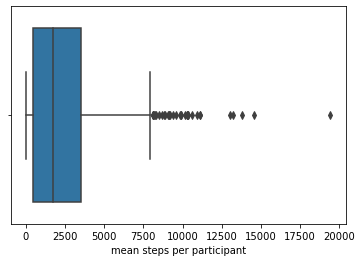

In [4]:
sns.boxplot(x= 'mean steps per participant', data=df)

Outliers verwijderen 

In [5]:
df = df[df['mean steps per participant'] < 15000]

In [6]:
df = df[df['weight'] < 600]

Boxplot en Histogram maken 

<AxesSubplot:xlabel='mean steps per participant'>

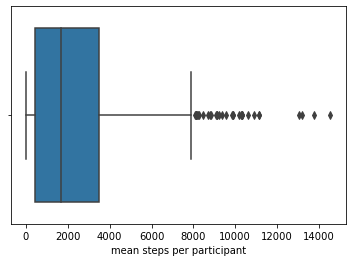

In [7]:
sns.boxplot(x= 'mean steps per participant', data=df)

<AxesSubplot:xlabel='mean steps per participant', ylabel='Count'>

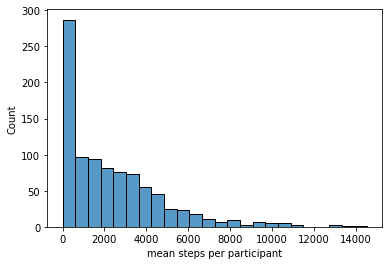

In [8]:
sns.histplot(x= 'mean steps per participant', data=df)

## Grafiek is right-skewed

<AxesSubplot:xlabel='mean steps per participant'>

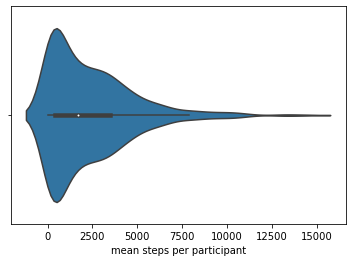

In [9]:
sns.violinplot(x= 'mean steps per participant', data=df)

## Gemiddelde, mediaan, standaard deviatie en variance berekenen

In [10]:
df.describe()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,hh_size,education,height,weight,mean steps per participant
count,927.000000,927.000000,927.000000,927.000000,927.00000,927.000000,927.000000,927.000000,927.000000,927.000000,...,927.000000,927.000000,927.000000,927.000000,927.0,927.000000,927.000000,927.000000,927.000000,927.000000
mean,465.837109,94.032362,2350.083064,3253.645092,2359.18986,3056.166127,3294.824164,2936.400216,3368.039914,4139.856526,...,708.371090,690.938511,565.380798,498.063646,0.0,2.338727,2.527508,171.515642,72.004315,2344.568070
std,268.001492,850.205391,5145.696743,6061.281662,5136.03089,5126.202354,5161.967598,5233.936220,4913.674629,5786.972761,...,3153.672926,2735.483143,3019.318454,2024.396072,0.0,1.225027,1.274034,10.669769,16.029131,2368.272498
min,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,0.000000,0.000000,0.054878
25%,234.500000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,165.000000,61.000000,434.861280
50%,466.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,2.000000,2.000000,172.000000,71.000000,1683.984756
75%,697.500000,0.000000,338.000000,4871.000000,2465.00000,5692.500000,6345.000000,4915.500000,6333.000000,8222.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,3.000000,4.000000,179.000000,81.000000,3490.201220
max,929.000000,11157.000000,44944.000000,39165.000000,40392.00000,29862.000000,23902.000000,31254.000000,23836.000000,43238.000000,...,33379.000000,27605.000000,36031.000000,15098.000000,0.0,11.000000,5.000000,195.000000,155.000000,14539.310976


<AxesSubplot:xlabel='age', ylabel='mean steps per participant'>

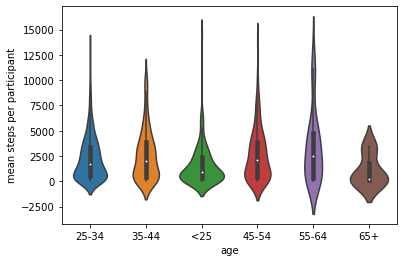

In [11]:
sns.violinplot(x='age',y= 'mean steps per participant', data=df)

<AxesSubplot:xlabel='education', ylabel='mean steps per participant'>

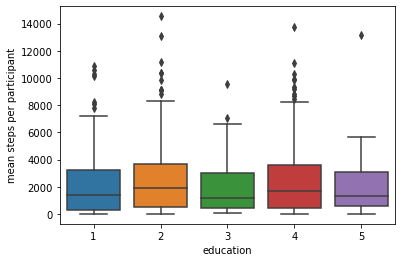

In [16]:
sns.boxplot(x='education',y= 'mean steps per participant', data=df)

Bij mensen van 65+ zijn er weinig mensen die veel stappen maken

Mensen met een hogere educatie maken niet meer stappen 